# Economic activities census on the ground floor of Barcelona

## Exploratory Data Analysis

### Dataset reference:
https://opendata-ajuntament.barcelona.cat/data/en/dataset/cens-activitats-comercials

Dataset includes data from 3 different years: 2014, 2016, and 2019.

However, according to the reference:

"El fitxer del 2014 està creat amb diferent metodologia que el del 2016, això fa que les dades no siguin comparables. El cens 2019 és una evolució del cens 2016 i ambdues bases de dades són comparables. (...)"

Data from 2014 is not comparable to 2016 and 2019; only 2016 and 2019 datasets were used.

Author: Bruna Correa

In [7]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set sns style
sns.set(style="ticks", color_codes=True)

# Plots main color
my_col = 'maroon'

In [8]:
# Load datasets
gf_bcn_2016 = pd.read_csv("../data/2016_cens_locals_plantabaixa.csv")
gf_bcn_2019 = pd.read_csv("../data/2019_cens_locals_plantabaixa.csv")

print(f'Shape 2016: {gf_bcn_2016.shape}')
print(f'Shape 2019: {gf_bcn_2019.shape}')

# Each year has a different set of features
# New features have been added in 2019

Shape 2016: (78033, 34)
Shape 2019: (80554, 49)


In [9]:
# 2016 Dataset - Columns info
gf_bcn_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78033 entries, 0 to 78032
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_BCN          78033 non-null  int64  
 1   ID_PRINCIP      78033 non-null  int64  
 2   N_PRINCIP       78033 non-null  object 
 3   ID_SECTOR       78033 non-null  int64  
 4   N_SECTOR        78033 non-null  object 
 5   ID_GRUPACT      78033 non-null  int64  
 6   N_GRUPACT       78033 non-null  object 
 7   ID_ACT          78033 non-null  int64  
 8   N_ACT           78033 non-null  object 
 9   N_LOCAL         78033 non-null  object 
 10  SN_CARRER       78033 non-null  int64  
 11  SN_MERCAT       78033 non-null  int64  
 12  ID_MERCAT       78033 non-null  int64  
 13  N_MERCAT        78033 non-null  object 
 14  SN_GALERIA      78033 non-null  int64  
 15  N_GALERIA       78033 non-null  object 
 16  SN_CCOMERC      78033 non-null  int64  
 17  ID_CCOMERC      78033 non-null 

In [10]:
# 2019 Dataset - Columns info
gf_bcn_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80554 entries, 0 to 80553
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_Bcn_2019               80554 non-null  int64  
 1   ID_Bcn_2016               70529 non-null  float64
 2   Codi_Principal_Activitat  80554 non-null  int64  
 3   Nom_Principal_Activitat   80554 non-null  object 
 4   Codi_Sector_Activitat     80554 non-null  int64  
 5   Nom_Sector_Activitat      80554 non-null  object 
 6   Codi_Grup_Activitat       80554 non-null  int64  
 7   Nom_Grup_Activitat        80554 non-null  object 
 8   Codi_Activitat_2019       80554 non-null  int64  
 9   Nom_Activitat             80554 non-null  object 
 10  Codi_Activitat_2016       80554 non-null  object 
 11  Nom_Local                 80554 non-null  object 
 12  SN_Oci_Nocturn            80554 non-null  int64  
 13  SN_Coworking              80554 non-null  int64  
 14  SN_Ser

In [11]:
# Show data head - 2016
pd.set_option("display.max_columns", None)
gf_bcn_2016.head()

,ID_BCN,ID_PRINCIP,N_PRINCIP,ID_SECTOR,N_SECTOR,ID_GRUPACT,N_GRUPACT,ID_ACT,N_ACT,N_LOCAL,SN_CARRER,SN_MERCAT,ID_MERCAT,N_MERCAT,SN_GALERIA,N_GALERIA,SN_CCOMERC,ID_CCOMERC,N_CCOMERC,N_CARRER,NUM_POLICI,REF_CAD,DATA,Codi_Barri,Nom_Barri,Codi_Districte,N_DISTRI,N_EIX,SN_EIX,SEC_CENS,Y_UTM_ETRS,X_UTM_ETRS,LATITUD,LONGITUD
0,49,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,INSIDE,0,0,0,,0,,1,CC003,Maremàgnum,MOLL ESPANYA,5.0,1813205DF3811D,2016-06-07,2,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580750.861,431675.395,41.375377,2.182944
1,50,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,KURTZ & GUT,0,0,0,,0,,1,CC003,Maremàgnum,MOLL ESPANYA,5.0,1813205DF3811D,2016-06-07,2,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580752.167,431687.786,41.375390,2.183092
2,51,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,SPRINGFIELD,0,0,0,,0,,1,CC003,Maremàgnum,MOLL ESPANYA,5.0,1813205DF3811D,2016-06-07,2,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580753.613,431698.242,41.375404,2.183217
3,52,1,Actiu,1,Comerç al detall,4,Equipament personal,4000,Calçat i pell,CASAS KIDS,0,0,0,,0,,1,CC003,Maremàgnum,MOLL ESPANYA,5.0,1813205DF3811D,2016-06-07,2,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580755.360,431709.717,41.375420,2.183354
4,53,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,BARITIMO LOUGE CLUB,0,0,0,,0,,1,CC003,Maremàgnum,MOLL ESPANYA,5.0,1813205DF3811D,2016-06-07,2,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580755.700,431723.319,41.375425,2.183517


In [12]:
# Show data head - 2019
pd.set_option("display.max_columns", None)
gf_bcn_2019.head()

,ID_Bcn_2019,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2019,Nom_Activitat,Codi_Activitat_2016,Nom_Local,SN_Oci_Nocturn,SN_Coworking,SN_Servei_Degustacio,SN_Obert24h,SN_Mixtura,SN_Carrer,SN_Mercat,Nom_Mercat,SN_Galeria,Nom_Galeria,SN_CComercial,Nom_CComercial,SN_Eix,Nom_Eix,X_UTM_ETRS89,Y_UTM_ETRS89,Latitud,Longitud,Direccio_Unica,Codi_Via,Nom_Via,Planta,Porta,Num_Policia_Inicial,Lletra_Inicial,Num_Policia_Final,Lletra_Final,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_cadastral,Data_Revisio
0,1075454,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,16004,SORIGUE,1,1,1,1,1,0,1,NaN,1,NaN,1,NaN,1,NaN,427229.272,4577543.637,41.346101,2.130166,"222206, 19-19, LOC 10",222206,MOTORS,LOC,10.0,19,NaN,19,NaN,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
1,1075453,NaN,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,1600102,CEJIDOS SIVILA S.A,1,1,1,1,1,0,1,NaN,1,NaN,1,NaN,1,NaN,427178.393,4577526.160,41.345939,2.129560,"222206, 278-282, LOC 10",222206,MOTORS,LOC,10.0,278,NaN,282,NaN,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
2,1075451,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,16004,QUALITY ESPRESO,1,1,1,1,1,0,1,NaN,1,NaN,1,NaN,1,NaN,427092.921,4577488.381,41.345591,2.128543,"222206, 1-9, LOC 10",222206,MOTORS,LOC,10.0,1,NaN,9,NaN,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
3,1075449,NaN,1,Actiu,3,Altres,17,Altres,1700100,Administració,17001,CLD,1,1,1,1,1,0,1,NaN,1,NaN,1,NaN,1,NaN,427265.676,4577561.147,41.346262,2.130599,"222206, 21-21, LOC 10",222206,MOTORS,LOC,10.0,21,NaN,21,NaN,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
4,1075448,NaN,1,Actiu,2,Serveis,16,Altres,1600101,Activitats de transport,1600101,"CATALANA DEL BUTANO,S.A",1,1,1,1,1,0,1,NaN,1,NaN,1,NaN,1,NaN,427322.177,4577588.560,41.346514,2.131271,"222206, 25-27, LOC 10",222206,MOTORS,LOC,10.0,25,NaN,27,NaN,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0


## Step1: Pre-processing and feature engineering

In [13]:
# Add Year_Census to both dataFrames
gf_bcn_2019['Year_Census'] = 2019
gf_bcn_2016['Year_Census'] = 2016

In [14]:
# Consolidate features to merge datasets
# Rename 2016 features according 2019

# Check column names and metadata reference to manually match them
print(f'2016: {gf_bcn_2016.columns}')
print(f'2019: {gf_bcn_2019.columns}')

column_names_cons2016 = ['ID_Bcn_2019', #2019
                         'Codi_Principal_Activitat',
                         'Nom_Principal_Activitat',
                         'Codi_Sector_Activitat',
                         'Nom_Sector_Activitat',
                         'Codi_Grup_Activitat',
                         'Nom_Grup_Activitat',
                         'Codi_Activitat_2019', #2019
                         'Nom_Activitat',
                         'Nom_Local',
                         'SN_Carrer',
                         'SN_Mercat', 
                         'ID_MERCAT', #Not in 2019
                         'Nom_Mercat',
                         'SN_Galeria', 
                         'Nom_Galeria',
                         'SN_CComercial', 
                         'ID_CCOMERC', #Not in 2019
                         'Nom_CComercial',
                         'Nom_Via',
                         'Porta', #
                         'Referencia_cadastral',
                         'Data_Revisio', #
                         'Codi_Barri', 
                         'Nom_Barri', 
                         'Codi_Districte', 
                         'Nom_Districte',
                         'SN_Eix',
                         'Nom_Eix',
                         'SEC_CENS', #Not in 2019
                         'Y_UTM_ETRS89',
                         'X_UTM_ETRS89',
                         'Latitud',
                         'Longitud',
                         'Year_Census'
                        ]

print(len(column_names_cons2016))

#Rename 2016 dataset columns
gf_bcn_2016.columns = column_names_cons2016
gf_bcn_2016.head()

2016: Index(['ID_BCN', 'ID_PRINCIP', 'N_PRINCIP', 'ID_SECTOR', 'N_SECTOR',
       'ID_GRUPACT', 'N_GRUPACT', 'ID_ACT', 'N_ACT', 'N_LOCAL', 'SN_CARRER',
       'SN_MERCAT', 'ID_MERCAT', 'N_MERCAT', 'SN_GALERIA', 'N_GALERIA',
       'SN_CCOMERC', 'ID_CCOMERC', 'N_CCOMERC', 'N_CARRER', 'NUM_POLICI',
       'REF_CAD', 'DATA', 'Codi_Barri', 'Nom_Barri', 'Codi_Districte',
       'N_DISTRI', 'N_EIX', 'SN_EIX', 'SEC_CENS', 'Y_UTM_ETRS', 'X_UTM_ETRS',
       'LATITUD', 'LONGITUD', 'Year_Census'],
      dtype='object')
2019: Index(['ID_Bcn_2019', 'ID_Bcn_2016', 'Codi_Principal_Activitat',
       'Nom_Principal_Activitat', 'Codi_Sector_Activitat',
       'Nom_Sector_Activitat', 'Codi_Grup_Activitat', 'Nom_Grup_Activitat',
       'Codi_Activitat_2019', 'Nom_Activitat', 'Codi_Activitat_2016',
       'Nom_Local', 'SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio',
       'SN_Obert24h', 'SN_Mixtura', 'SN_Carrer', 'SN_Mercat', 'Nom_Mercat',
       'SN_Galeria', 'Nom_Galeria', 'SN_CComercial', 'N

,ID_Bcn_2019,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2019,Nom_Activitat,Nom_Local,SN_Carrer,SN_Mercat,ID_MERCAT,Nom_Mercat,SN_Galeria,Nom_Galeria,SN_CComercial,ID_CCOMERC,Nom_CComercial,Nom_Via,Porta,Referencia_cadastral,Data_Revisio,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,SN_Eix,Nom_Eix,SEC_CENS,Y_UTM_ETRS89,X_UTM_ETRS89,Latitud,Longitud,Year_Census
0,49,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,INSIDE,0,0,0,,0,,1,CC003,Maremàgnum,MOLL ESPANYA,5.0,1813205DF3811D,2016-06-07,2,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580750.861,431675.395,41.375377,2.182944,2016
1,50,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,KURTZ & GUT,0,0,0,,0,,1,CC003,Maremàgnum,MOLL ESPANYA,5.0,1813205DF3811D,2016-06-07,2,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580752.167,431687.786,41.375390,2.183092,2016
2,51,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,SPRINGFIELD,0,0,0,,0,,1,CC003,Maremàgnum,MOLL ESPANYA,5.0,1813205DF3811D,2016-06-07,2,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580753.613,431698.242,41.375404,2.183217,2016
3,52,1,Actiu,1,Comerç al detall,4,Equipament personal,4000,Calçat i pell,CASAS KIDS,0,0,0,,0,,1,CC003,Maremàgnum,MOLL ESPANYA,5.0,1813205DF3811D,2016-06-07,2,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580755.360,431709.717,41.375420,2.183354,2016
4,53,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,BARITIMO LOUGE CLUB,0,0,0,,0,,1,CC003,Maremàgnum,MOLL ESPANYA,5.0,1813205DF3811D,2016-06-07,2,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580755.700,431723.319,41.375425,2.183517,2016


In [15]:
# Subselect common potentially interesting columns
sub_cols = ['ID_Bcn_2019', 
            'Codi_Principal_Activitat',
            'Nom_Principal_Activitat',
            'Codi_Sector_Activitat',
            'Nom_Sector_Activitat',
            'Codi_Grup_Activitat',
            'Nom_Grup_Activitat',
            'Codi_Activitat_2019',
            'Nom_Activitat',
            'Nom_Local',
            'SN_Carrer',
            'SN_Mercat', 
            'SN_Galeria', 
            'SN_CComercial', 
            'Codi_Barri', 
            'Nom_Barri', 
            'Codi_Districte', 
            'Nom_Districte',
            'Y_UTM_ETRS89',
            'X_UTM_ETRS89',
            'Latitud',
            'Longitud',
            'Year_Census'
        ]

# Subselect columns 2016
sub_gf_bcn_2016 = gf_bcn_2016[sub_cols]
# Subselect columns 2019
sub_gf_bcn_2019 = gf_bcn_2019[sub_cols]

#Merge both datasets
merged_gf_bcn = pd.concat([sub_gf_bcn_2016, 
                           sub_gf_bcn_2019],
                         axis=0).reset_index(drop=True)


#Rename columns with '2019'
merged_gf_bcn.rename(columns={"ID_Bcn_2019": "ID_Bcn",
                              "Codi_Activitat_2019": "Codi_Activitat"},
                    inplace=True)

# Look at the merged dataframe
print(merged_gf_bcn.shape)
merged_gf_bcn.head()

(158587, 23)


,ID_Bcn,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat,Nom_Activitat,Nom_Local,SN_Carrer,SN_Mercat,SN_Galeria,SN_CComercial,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Y_UTM_ETRS89,X_UTM_ETRS89,Latitud,Longitud,Year_Census
0,49,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,INSIDE,0,0,0,1,2,el Barri Gòtic,1,Ciutat Vella,4580750.861,431675.395,41.375377,2.182944,2016
1,50,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,KURTZ & GUT,0,0,0,1,2,el Barri Gòtic,1,Ciutat Vella,4580752.167,431687.786,41.375390,2.183092,2016
2,51,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,SPRINGFIELD,0,0,0,1,2,el Barri Gòtic,1,Ciutat Vella,4580753.613,431698.242,41.375404,2.183217,2016
3,52,1,Actiu,1,Comerç al detall,4,Equipament personal,4000,Calçat i pell,CASAS KIDS,0,0,0,1,2,el Barri Gòtic,1,Ciutat Vella,4580755.360,431709.717,41.375420,2.183354,2016
4,53,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,BARITIMO LOUGE CLUB,0,0,0,1,2,el Barri Gòtic,1,Ciutat Vella,4580755.700,431723.319,41.375425,2.183517,2016


In [16]:
# Check for missing values
merged_gf_bcn.isnull().mean().sort_values()

ID_Bcn                      0.0
Latitud                     0.0
X_UTM_ETRS89                0.0
Y_UTM_ETRS89                0.0
Nom_Districte               0.0
Codi_Districte              0.0
Nom_Barri                   0.0
Codi_Barri                  0.0
SN_CComercial               0.0
SN_Galeria                  0.0
Longitud                    0.0
SN_Mercat                   0.0
Nom_Local                   0.0
Nom_Activitat               0.0
Codi_Activitat              0.0
Nom_Grup_Activitat          0.0
Codi_Grup_Activitat         0.0
Nom_Sector_Activitat        0.0
Codi_Sector_Activitat       0.0
Nom_Principal_Activitat     0.0
Codi_Principal_Activitat    0.0
SN_Carrer                   0.0
Year_Census                 0.0
dtype: float64

- No missing values!

## Step2: EDA

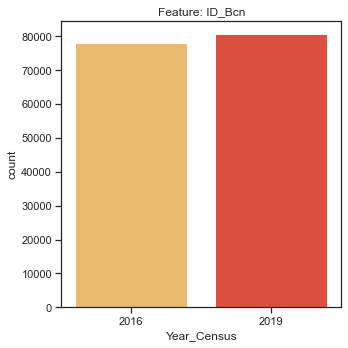

In [26]:
# Plot number of stablishments by year

plt.figure(figsize=(5,5))
sns.countplot(x='Year_Census', 
              data=merged_gf_bcn,
              #order = merged_gf_bcn['Year_Census'].value_counts().index,
              palette='YlOrRd')

plt.title('Feature: ' + 'ID_Bcn', fontsize=12)
plt.tight_layout()

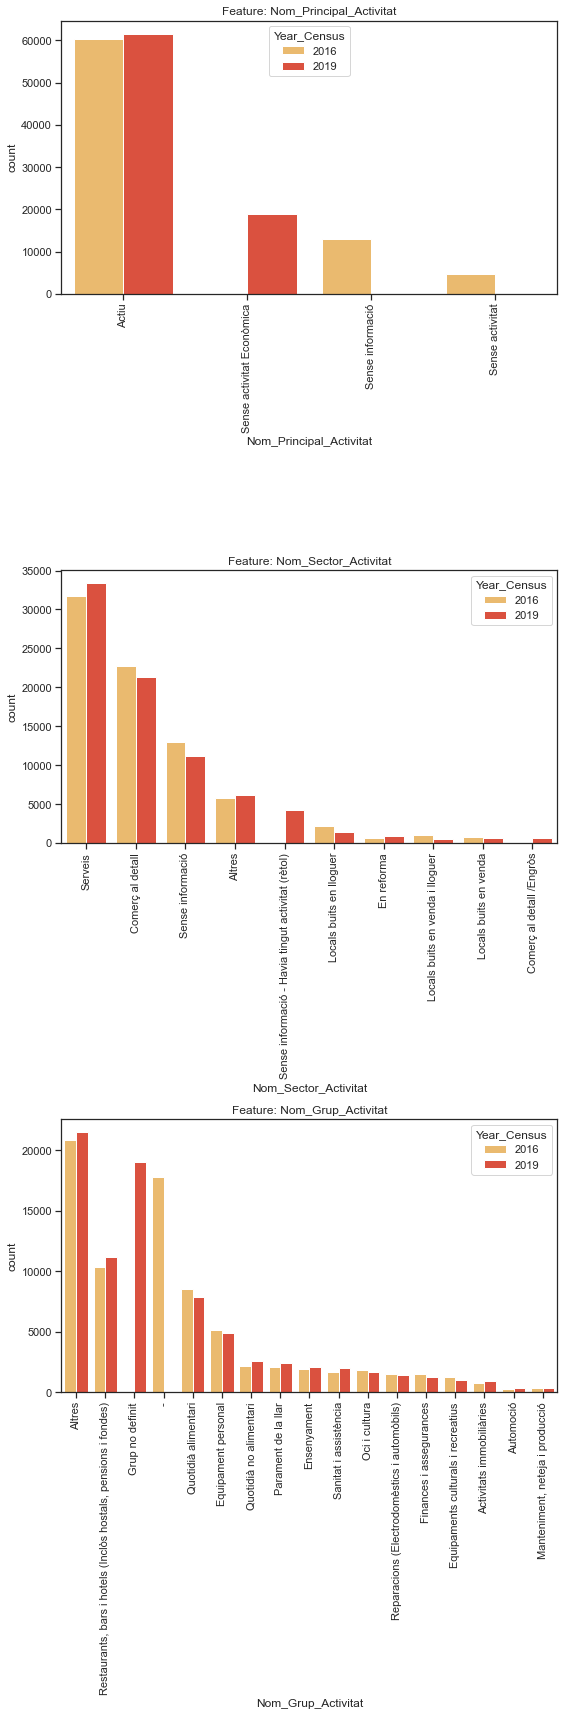

In [27]:
# Plot categorical features related to activity type
features_cat = ['Nom_Principal_Activitat',
               'Nom_Sector_Activitat',
               'Nom_Grup_Activitat']

# Plot categorical features
ncol = 1
nrow = 3

plt.figure(figsize=(8,24))
for i, feat in enumerate(features_cat):
    plt.subplot(nrow,ncol,i+1)
    sns.countplot(x=feat, 
                  data=merged_gf_bcn,
                  hue='Year_Census',
                  order = merged_gf_bcn[feat].value_counts().index,
                  palette='YlOrRd')
    plt.xticks(rotation='vertical')
    plt.title('Feature: ' + feat, fontsize=12)
plt.tight_layout()

- Some descriptions were modified from one year to the other: e.g. Sense activitat Econòmica; Sense activitat
- Consolidate them!

In [28]:
# Check descriptions
# "Nom_Principal_Activitat"
print(f'2019\n{sub_gf_bcn_2019["Nom_Principal_Activitat"].value_counts(normalize=True)}\n')
print(f'2016\n{sub_gf_bcn_2016["Nom_Principal_Activitat"].value_counts(normalize=True)}\n')

# 'Nom_Sector_Activitat'
print(f'2019\n{sub_gf_bcn_2019["Nom_Sector_Activitat"].value_counts(normalize=True)}\n')
print(f'2016\n{sub_gf_bcn_2016["Nom_Sector_Activitat"].value_counts(normalize=True)}\n')

#'Nom_Grup_Activitat'
print(f'2019\n{sub_gf_bcn_2019["Nom_Grup_Activitat"].value_counts(normalize=True)}\n')
print(f'2016\n{sub_gf_bcn_2016["Nom_Grup_Activitat"].value_counts(normalize=True)}\n')

2019
Actiu                        0.764183
Sense activitat Econòmica    0.235817
Name: Nom_Principal_Activitat, dtype: float64

2016
Actiu               0.772301
Sense informació    0.166891
Sense activitat     0.060808
Name: Nom_Principal_Activitat, dtype: float64

2019
Serveis                                              0.414654
Comerç al detall                                     0.264742
Sense informació                                     0.138590
Altres                                               0.076321
Sense informació - Havia tingut activitat (rètol)    0.053082
Locals buits en lloguer                              0.017330
En reforma                                           0.011843
Comerç al detall /Engròs                             0.008466
Locals buits en venda                                0.007970
Locals buits en venda i lloguer                      0.007002
Name: Nom_Sector_Activitat, dtype: float64

2016
Serveis                            0.407174
Comerç al detal

In [29]:
# Consolidate descriptions: 'Nom_Principal_Activitat'
# Apply it to 2019 dataframe
rep_dict = {'Sense activitat Econòmica': 'Sense activitat'}
sub_gf_bcn_2019['Nom_Principal_Activitat'] = sub_gf_bcn_2019['Nom_Principal_Activitat'].replace(rep_dict)  

# Consolidate descriptions: 'Nom_Grup_Activitat'
# Apply it to 2016 dataframe
rep_dict = {'-': 'Grup no definit'}
sub_gf_bcn_2016['Nom_Grup_Activitat'] = sub_gf_bcn_2016['Nom_Grup_Activitat'].replace(rep_dict)  

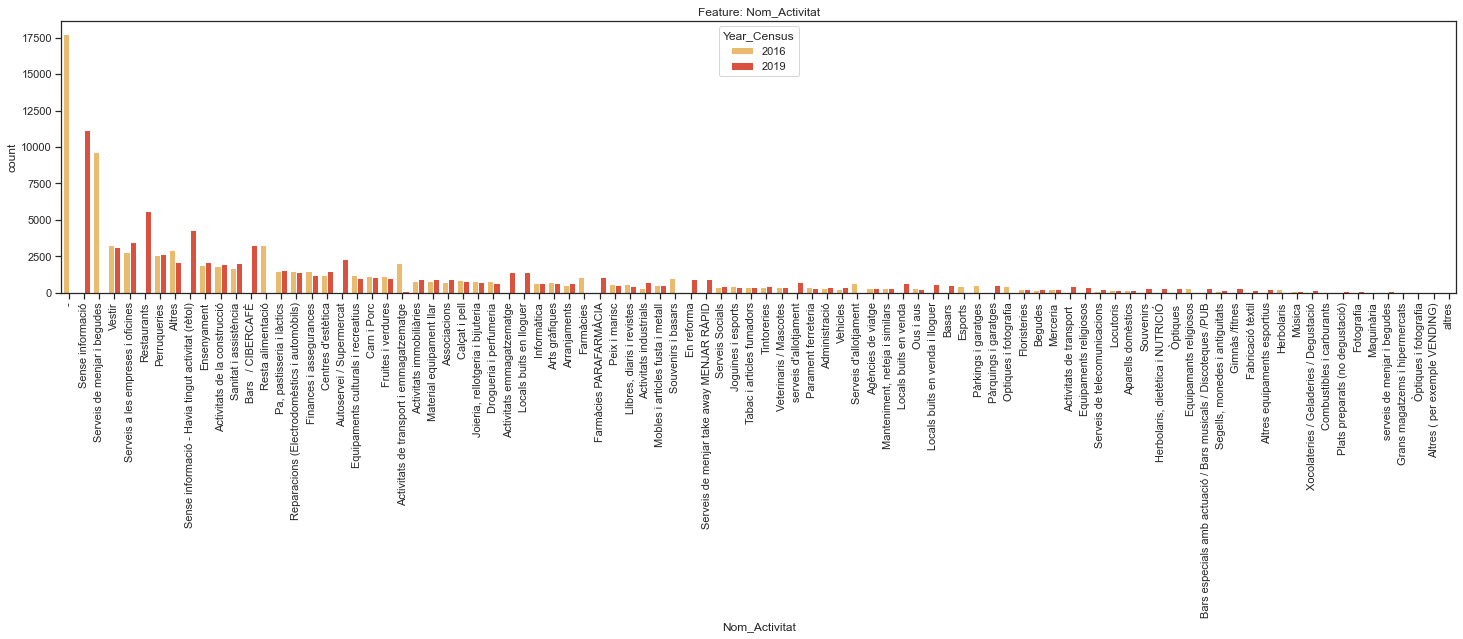

In [30]:
# Plot 'Nom_Activitat' separetly to get better visualization
plt.figure(figsize=(25,5))
sns.countplot(x='Nom_Activitat', 
              data=merged_gf_bcn,
              hue='Year_Census',
              palette='YlOrRd',
              order = merged_gf_bcn['Nom_Activitat'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Feature: ' + 'Nom_Activitat', fontsize=12)
plt.tight_layout()

In [31]:
#'Nom_Activitat'
print(f'2019\n{sub_gf_bcn_2019["Nom_Activitat"].value_counts(normalize=True)}\n')
print(f'2016\n{sub_gf_bcn_2016["Nom_Activitat"].value_counts(normalize=True)}\n')

2019
Sense informació                                     0.138590
Restaurants                                          0.069506
Sense informació - Havia tingut activitat (rètol)    0.053082
Serveis a les empreses i oficines                    0.043002
Bars   / CIBERCAFÈ                                   0.040842
                                                       ...   
Souvenirs i basars                                   0.000497
Òptiques i fotografia                                0.000335
Grans magatzems i hipermercats                       0.000248
Altres ( per exemple VENDING)                        0.000199
altres                                               0.000199
Name: Nom_Activitat, Length: 83, dtype: float64

2016
-                                 0.227699
Serveis de menjar i begudes       0.124050
Vestir                            0.042239
Resta alimentació                 0.041854
Altres                            0.037241
                                    ...   
M

In [32]:
# Consolidate descriptions: 'Nom_Activitat'
# Apply it to 2016 dataframe
rep_dict = {'-': 'Sense informació'}
sub_gf_bcn_2016['Nom_Activitat'] = sub_gf_bcn_2016['Nom_Activitat'].replace(rep_dict)  

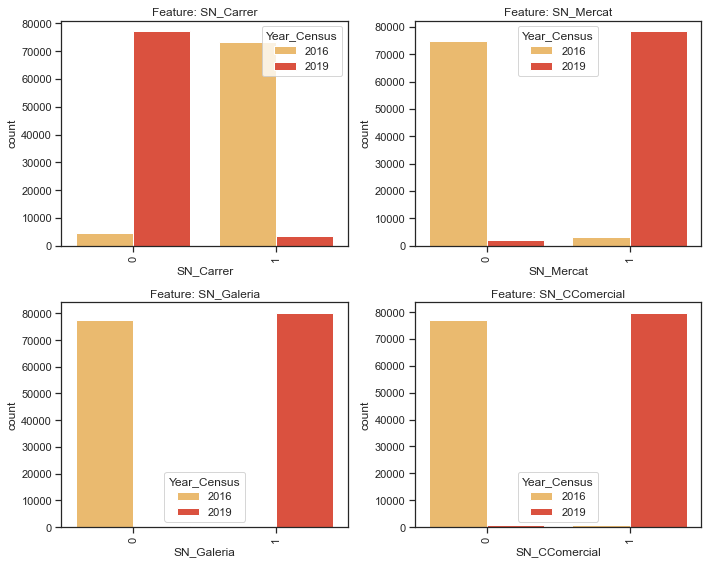

In [33]:
# Plot binary features related to activity type
features_bin = ['SN_Carrer',
                'SN_Mercat',
                'SN_Galeria',
                'SN_CComercial']

# Plot categorical features
ncol = 2
nrow = 2

plt.figure(figsize=(10,8))
for i, feat in enumerate(features_bin):
    plt.subplot(nrow,ncol,i+1)
    sns.countplot(x=feat, 
                  data=merged_gf_bcn,
                  hue='Year_Census',
                  palette='YlOrRd')
    plt.xticks(rotation='vertical')
    plt.title('Feature: ' + feat, fontsize=12)
plt.tight_layout()

- Something is not right, proportions completly changed from 2016 to 2019.
- Maybe they modified the encoding (0,1 / 1,0). 
- Check it manualy and consolidate them!

In [34]:
# Print proportions
print(sub_gf_bcn_2019['SN_Galeria'].value_counts(normalize=True))
print(sub_gf_bcn_2016['SN_Galeria'].value_counts(normalize=True))

1    0.994687
0    0.005313
Name: SN_Galeria, dtype: float64
0    0.995105
1    0.004895
Name: SN_Galeria, dtype: float64


In [35]:
# Looking at the tables, it seems binary encoding was altered from 2016 to 2019
# Consolidated encoding: 0 = No; 1 = Yes

# Apply it to 2019 dataframe
rep_dict = {1: 0,
            0: 1}
for feat in features_bin:
    sub_gf_bcn_2019[feat] = sub_gf_bcn_2019[feat].map(rep_dict)  

In [36]:
# Merge dataframes again after consolidation of 2016 and 2019 descriptions
merged_gf_bcn = pd.concat([sub_gf_bcn_2016, 
                           sub_gf_bcn_2019],
                         axis=0).reset_index(drop=True)


#Rename columns with '2019'
merged_gf_bcn.rename(columns={"ID_Bcn_2019": "ID_Bcn",
                              "Codi_Activitat_2019": "Codi_Activitat"},
                    inplace=True)

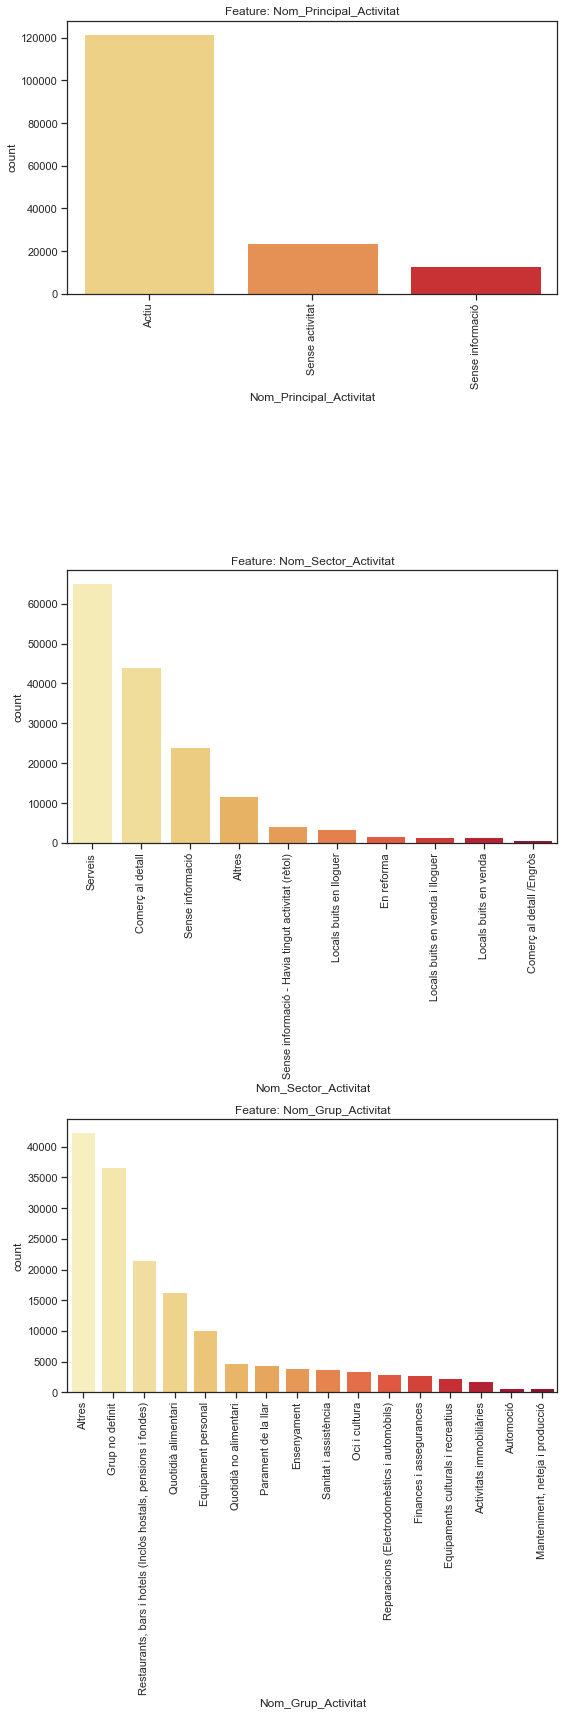

In [37]:
# Re-Plot!
# Plot categorical features related to activity type
features_cat = ['Nom_Principal_Activitat',
               'Nom_Sector_Activitat',
               'Nom_Grup_Activitat']

# Plot categorical features
ncol = 1
nrow = 3

plt.figure(figsize=(8,24))
for i, feat in enumerate(features_cat):
    plt.subplot(nrow,ncol,i+1)
    sns.countplot(x=feat, 
                  data=merged_gf_bcn,
                  #hue='Year_Census',
                  order = merged_gf_bcn[feat].value_counts().index,
                  palette='YlOrRd')
    plt.xticks(rotation='vertical')
    plt.title('Feature: ' + feat, fontsize=12)
plt.tight_layout()

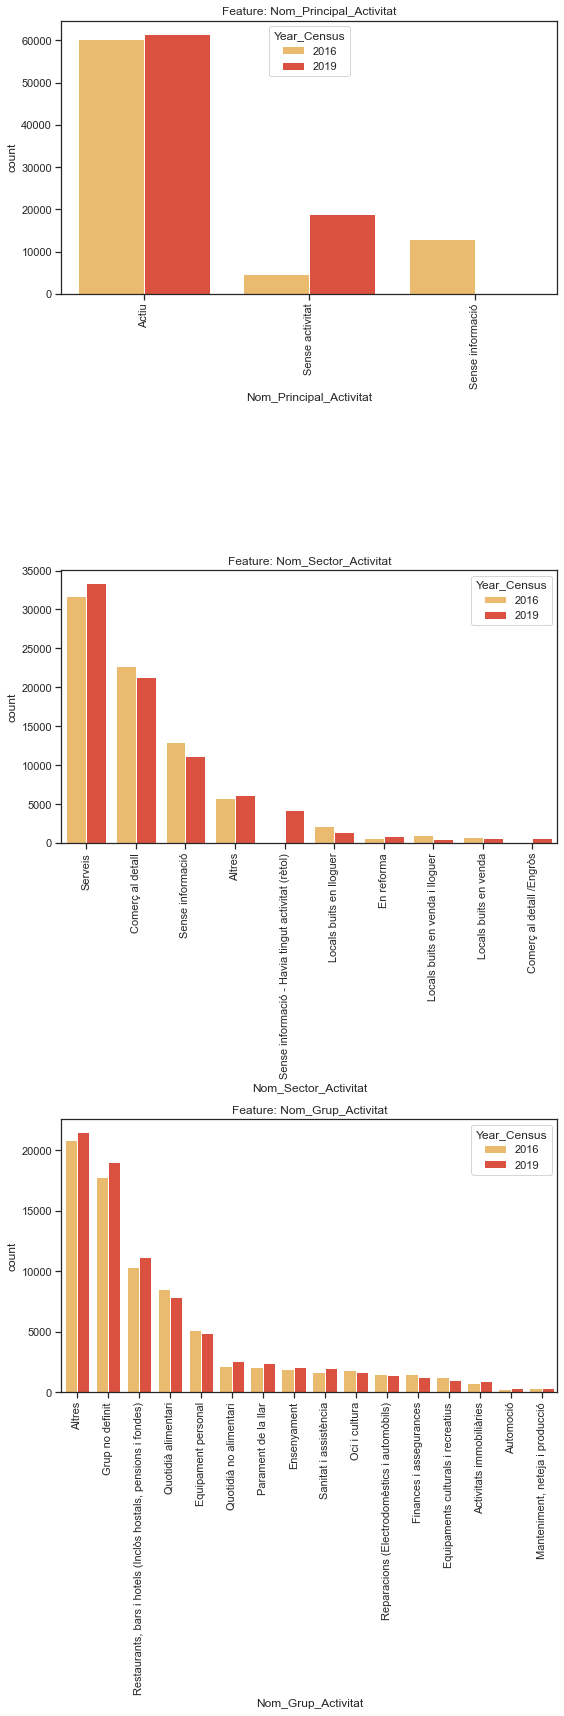

In [38]:
# Re-Plot!
# Plot categorical features related to activity type - By Year
features_cat = ['Nom_Principal_Activitat',
               'Nom_Sector_Activitat',
               'Nom_Grup_Activitat']

# Plot categorical features
ncol = 1
nrow = 3

plt.figure(figsize=(8,24))
for i, feat in enumerate(features_cat):
    plt.subplot(nrow,ncol,i+1)
    sns.countplot(x=feat, 
                  data=merged_gf_bcn,
                  hue='Year_Census',
                  order = merged_gf_bcn[feat].value_counts().index,
                  palette='YlOrRd')
    plt.xticks(rotation='vertical')
    plt.title('Feature: ' + feat, fontsize=12)
plt.tight_layout()

* Increase in services from 2016 to 2019
    * Mostly related to increase in the number of Restaurants, bars and hotels

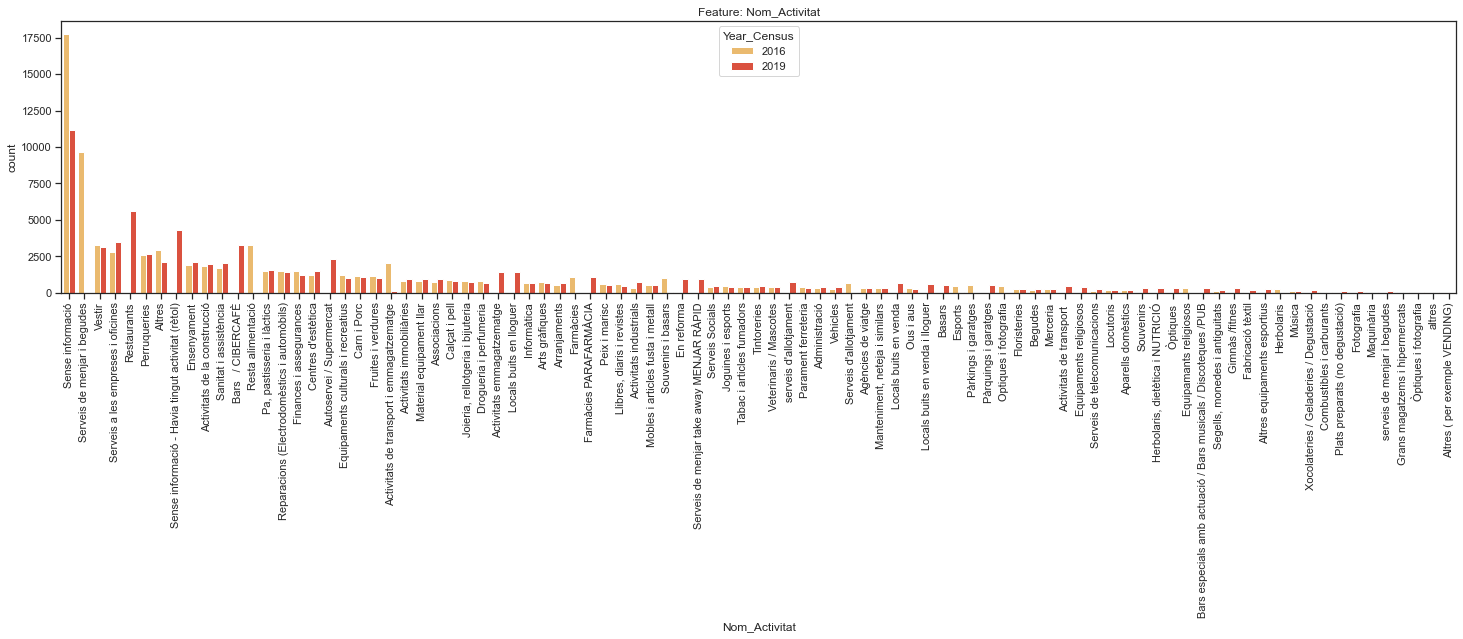

In [144]:
# Re-Plot!
# Plot 'Nom_Activitat' separetly to get better visualization
plt.figure(figsize=(25,5))
sns.countplot(x='Nom_Activitat', 
              data=merged_gf_bcn,
              hue='Year_Census',
              palette='YlOrRd',
              order = merged_gf_bcn['Nom_Activitat'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Feature: ' + 'Nom_Activitat', fontsize=12)
plt.tight_layout()

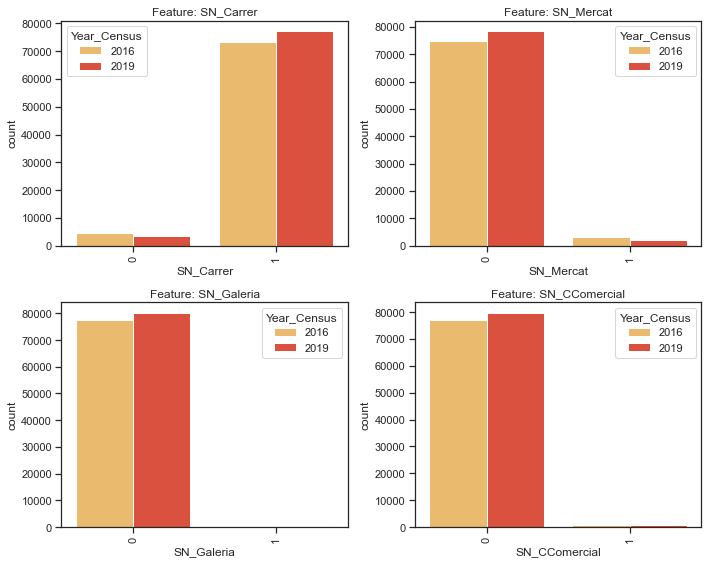

In [40]:
# Re-Plot!
# Plot binary features related to activity type
features_bin = ['SN_Carrer',
                'SN_Mercat',
                'SN_Galeria',
                'SN_CComercial']

# Plot categorical features
ncol = 2
nrow = 2

plt.figure(figsize=(10,8))
for i, feat in enumerate(features_bin):
    plt.subplot(nrow,ncol,i+1)
    sns.countplot(x=feat, 
                  data=merged_gf_bcn,
                  hue='Year_Census',
                  palette='YlOrRd')
    plt.xticks(rotation='vertical')
    plt.title('Feature: ' + feat, fontsize=12)
plt.tight_layout()

* Now it looks better!
    * It seems proportions didn't change much between 2016 and 2019
    * Most of the places are located on the street
    * Number of places located in markets decreased from 2016 to 2019

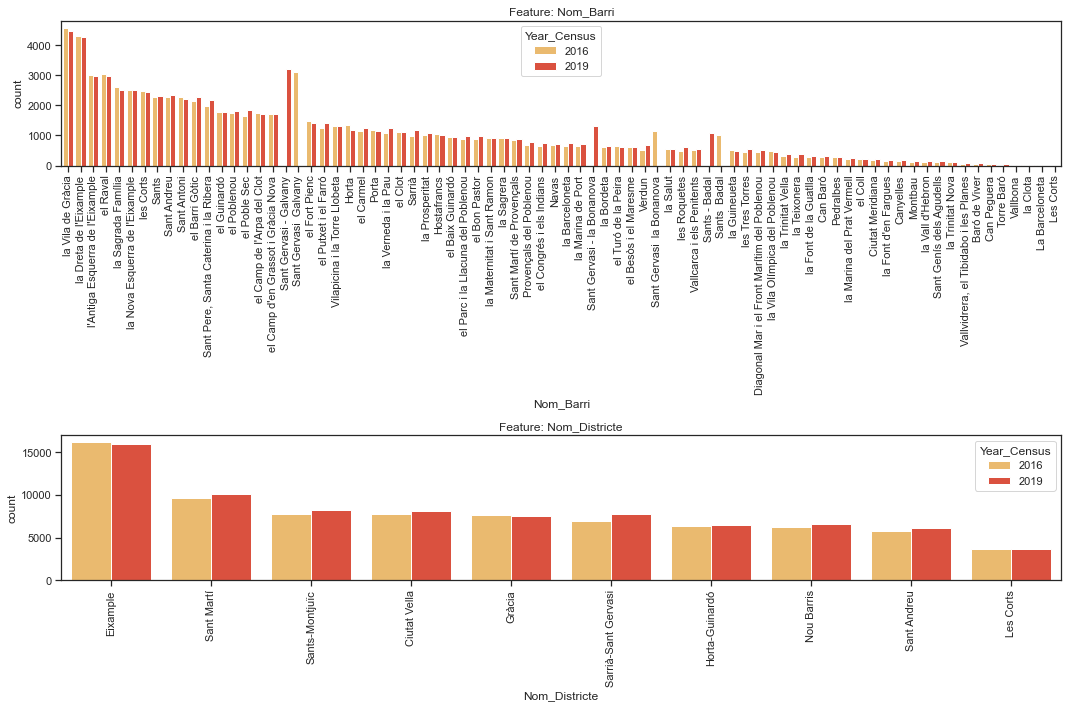

In [41]:
# Plot features related to districts and neighborhoods 
features_loc = ['Nom_Barri',
                'Nom_Districte']

# Plot categorical features
ncol = 1
nrow = 2

plt.figure(figsize=(15,10))
for i, feat in enumerate(features_loc):
    plt.subplot(nrow,ncol,i+1)
    sns.countplot(x=feat, 
                  data=merged_gf_bcn,
                  hue='Year_Census',
                  order = merged_gf_bcn[feat].value_counts().index,
                  palette='YlOrRd')
    plt.xticks(rotation='vertical')
    plt.title('Feature: ' + feat, fontsize=12)
plt.tight_layout()

- Some neighborhood names need to be consolidated as well

In [42]:
# Consolidate neighborhood names: 'Nom_Barri'
# Apply it to 2016 dataframe
rep_dict = {'Sant Gervasi  Galvany': 'Sant Gervasi - Galvany',
            'Sant Gervasi  la Bonanov':'Sant Gervasi - la Bonanova',
            'La Barceloneta':'la Barceloneta',
            'Sants  Badal':'Sants - Badal',
            'Sant Gervasi  la Bonanova': 'Sant Gervasi - la Bonanova'}
sub_gf_bcn_2016['Nom_Barri'] = sub_gf_bcn_2016['Nom_Barri'].replace(rep_dict)

In [43]:
sub_gf_bcn_2019['Nom_Barri'].value_counts(normalize=True)

la Vila de Gràcia                  0.055329
la Dreta de l'Eixample             0.053120
Sant Gervasi - Galvany             0.039725
l'Antiga Esquerra de l'Eixample    0.037043
el Raval                           0.036845
                                     ...   
Baró de Viver                      0.000956
Can Peguera                        0.000546
Torre Baró                         0.000459
Vallbona                           0.000335
la Clota                           0.000248
Name: Nom_Barri, Length: 73, dtype: float64

In [44]:
# Merge dataframes again after consolidation of 2016 and 2019 descriptions
merged_gf_bcn = pd.concat([sub_gf_bcn_2016, 
                           sub_gf_bcn_2019],
                         axis=0).reset_index(drop=True)


#Rename columns with '2019'
merged_gf_bcn.rename(columns={"ID_Bcn_2019": "ID_Bcn",
                              "Codi_Activitat_2019": "Codi_Activitat"},
                    inplace=True)

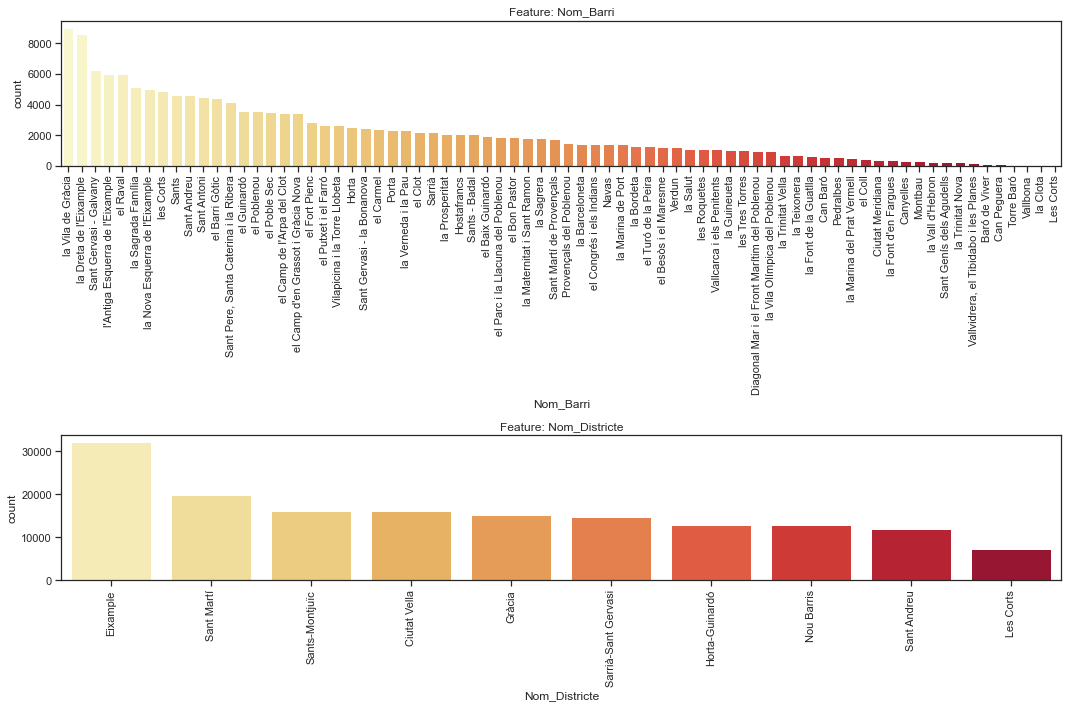

In [45]:
# Re-Plot
# Plot features related to districts and neighborhoods 
features_loc = ['Nom_Barri',
                'Nom_Districte']

# Plot categorical features
ncol = 1
nrow = 2

plt.figure(figsize=(15,10))
for i, feat in enumerate(features_loc):
    plt.subplot(nrow,ncol,i+1)
    sns.countplot(x=feat, 
                  data=merged_gf_bcn,
                  order = merged_gf_bcn[feat].value_counts().index,
                  palette='YlOrRd')
    plt.xticks(rotation='vertical')
    plt.title('Feature: ' + feat, fontsize=12)
plt.tight_layout()

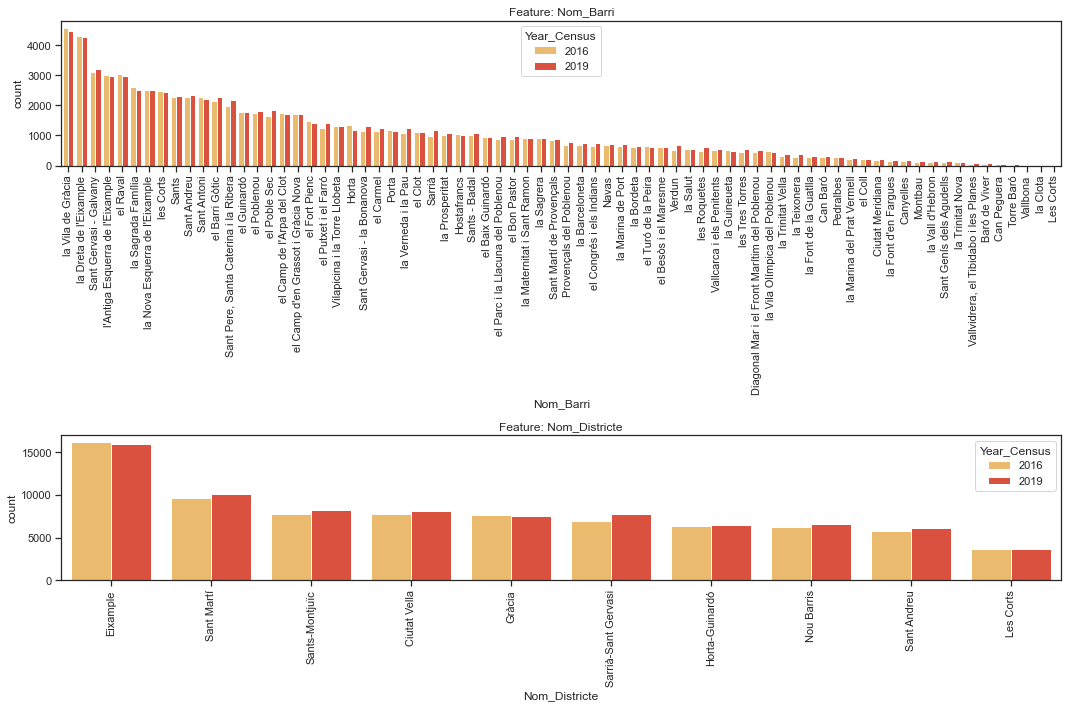

In [46]:
# Re-Plot
# Plot features related to districts and neighborhoods - By year 
features_loc = ['Nom_Barri',
                'Nom_Districte']

# Plot categorical features
ncol = 1
nrow = 2

plt.figure(figsize=(15,10))
for i, feat in enumerate(features_loc):
    plt.subplot(nrow,ncol,i+1)
    sns.countplot(x=feat, 
                  data=merged_gf_bcn,
                  hue='Year_Census',
                  order = merged_gf_bcn[feat].value_counts().index,
                  palette='YlOrRd')
    plt.xticks(rotation='vertical')
    plt.title('Feature: ' + feat, fontsize=12)
plt.tight_layout()

* In general, counts didn't change a lot between 2016 and 2019, but we could observe a small increase in the numbers in multiple districts:
    * Small Increase:
        * Sant Marti
        * Sants-Monjuic
        * Ciutat Vella
        * Sarria-Sant Gervasi
        * Horta-Guinardo
        * Nou Barris
        * Sant Andreu
    * Small Decrease:
        * Eixample
        * Gracia
    * Didn't change:
        * Les Corts


In [47]:
# Get proportions by Barri
merged_gf_bcn['Nom_Barri'].value_counts(normalize=True)

la Vila de Gràcia                  0.056991
la Dreta de l'Eixample             0.054172
Sant Gervasi - Galvany             0.039675
l'Antiga Esquerra de l'Eixample    0.037828
el Raval                           0.037815
                                     ...   
Can Peguera                        0.000549
Torre Baró                         0.000366
Vallbona                           0.000322
la Clota                           0.000221
Les Corts                          0.000006
Name: Nom_Barri, Length: 74, dtype: float64

In [48]:
# Get proportions by District
merged_gf_bcn['Nom_Districte'].value_counts(normalize=True)

Eixample               0.202368
Sant Martí             0.124922
Sants-Montjuïc         0.100960
Ciutat Vella           0.100771
Gràcia                 0.095071
Sarrià-Sant Gervasi    0.092713
Horta-Guinardó         0.080990
Nou Barris             0.080751
Sant Andreu            0.075366
Les Corts              0.046088
Name: Nom_Districte, dtype: float64

In [49]:
# Dig into Restaurants, bars and hotels:
# the category that changed the most between 2016 and 2019)
rest_merged_gf_bcn = merged_gf_bcn[merged_gf_bcn['Nom_Grup_Activitat']=='Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)']
print(rest_merged_gf_bcn.shape)
rest_merged_gf_bcn.head()

(21496, 23)


,ID_Bcn,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat,Nom_Activitat,Nom_Local,SN_Carrer,SN_Mercat,SN_Galeria,SN_CComercial,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Y_UTM_ETRS89,X_UTM_ETRS89,Latitud,Longitud,Year_Census
1,50,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,KURTZ & GUT,0,0,0,1,2,el Barri Gòtic,1,Ciutat Vella,4580752.167,431687.786,41.375390,2.183092,2016
4,53,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,BARITIMO LOUGE CLUB,0,0,0,1,2,el Barri Gòtic,1,Ciutat Vella,4580755.700,431723.319,41.375425,2.183517,2016
10,59,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,SUBWAY,0,0,0,1,2,el Barri Gòtic,1,Ciutat Vella,4580765.571,431705.875,41.375512,2.183307,2016
11,60,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,HÄAGEN DAZ,0,0,0,1,2,el Barri Gòtic,1,Ciutat Vella,4580766.394,431694.602,41.375519,2.183172,2016
12,61,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,DUNKIN'COFFEE,0,0,0,1,2,el Barri Gòtic,1,Ciutat Vella,4580768.795,431643.468,41.375536,2.182560,2016


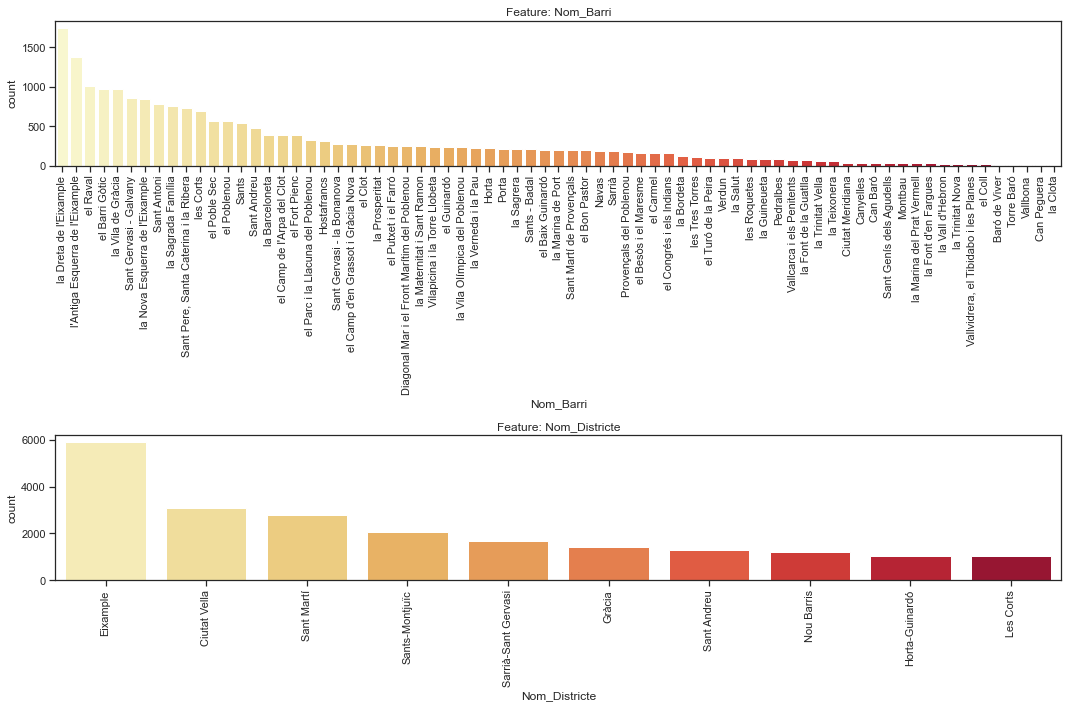

In [50]:
# Plot features related to districts and neighborhoods 
features_loc = ['Nom_Barri',
                'Nom_Districte']

# Plot categorical features
ncol = 1
nrow = 2

plt.figure(figsize=(15,10))
for i, feat in enumerate(features_loc):
    plt.subplot(nrow,ncol,i+1)
    sns.countplot(x=feat, 
                  data=rest_merged_gf_bcn,
                  order = rest_merged_gf_bcn[feat].value_counts().index,
                  palette='YlOrRd')
    plt.xticks(rotation='vertical')
    plt.title('Feature: ' + feat, fontsize=12)
plt.tight_layout()

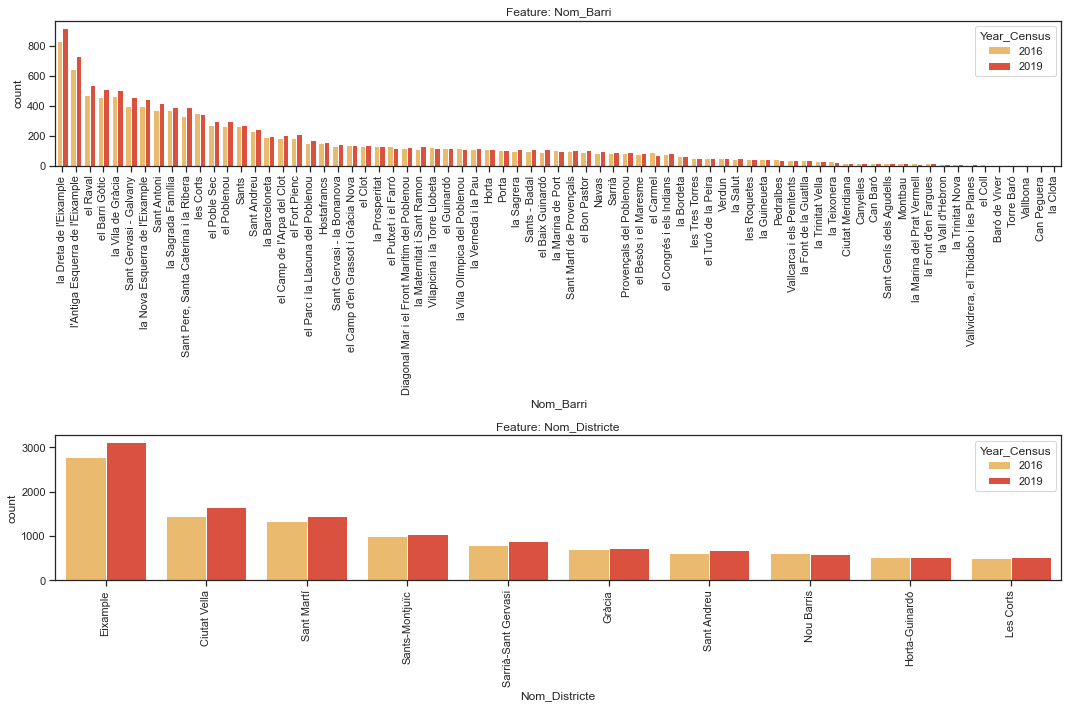

In [51]:
# Plot features related to districts and neighborhoods - By Year
features_loc = ['Nom_Barri',
                'Nom_Districte']

# Plot categorical features
ncol = 1
nrow = 2

plt.figure(figsize=(15,10))
for i, feat in enumerate(features_loc):
    plt.subplot(nrow,ncol,i+1)
    sns.countplot(x=feat, 
                  data=rest_merged_gf_bcn,
                  hue='Year_Census',
                  order = rest_merged_gf_bcn[feat].value_counts().index,
                  palette='YlOrRd')
    plt.xticks(rotation='vertical')
    plt.title('Feature: ' + feat, fontsize=12)
plt.tight_layout()

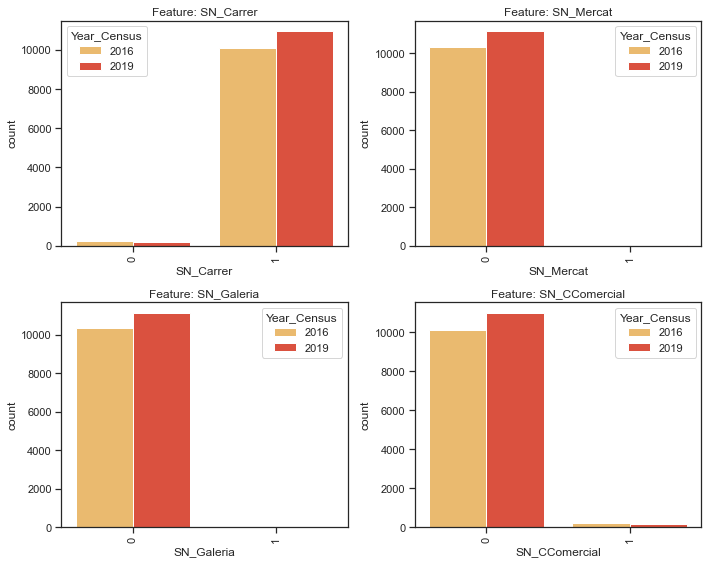

In [175]:
# Plot binary features related to activity type
features_bin = ['SN_Carrer',
                'SN_Mercat',
                'SN_Galeria',
                'SN_CComercial']

# Plot categorical features
ncol = 2
nrow = 2

plt.figure(figsize=(10,8))
for i, feat in enumerate(features_bin):
    plt.subplot(nrow,ncol,i+1)
    sns.countplot(x=feat, 
                  data=rest_merged_gf_bcn,
                  hue='Year_Census',
                  palette='YlOrRd')
    plt.xticks(rotation='vertical')
    plt.title('Feature: ' + feat, fontsize=12)
plt.tight_layout()

In [181]:
# Explore some specific features only available in 2019:

# Plot binary features related to activity type
features_bin_2019 = ['SN_Oci_Nocturn',
                     'SN_Coworking',
                     'SN_Servei_Degustacio',
                     'SN_Obert24h'
                    ]

# Print counts
for feat in features_bin_2019:
    print(gf_bcn_2019[feat].value_counts(normalize=False))

1    80320
0      234
Name: SN_Oci_Nocturn, dtype: int64
1    80223
0      331
Name: SN_Coworking, dtype: int64
1    79765
0      789
Name: SN_Servei_Degustacio, dtype: int64
1    80286
0      268
Name: SN_Obert24h, dtype: int64


* Remember, encoding here means: 0 = Yes; 1 = No.

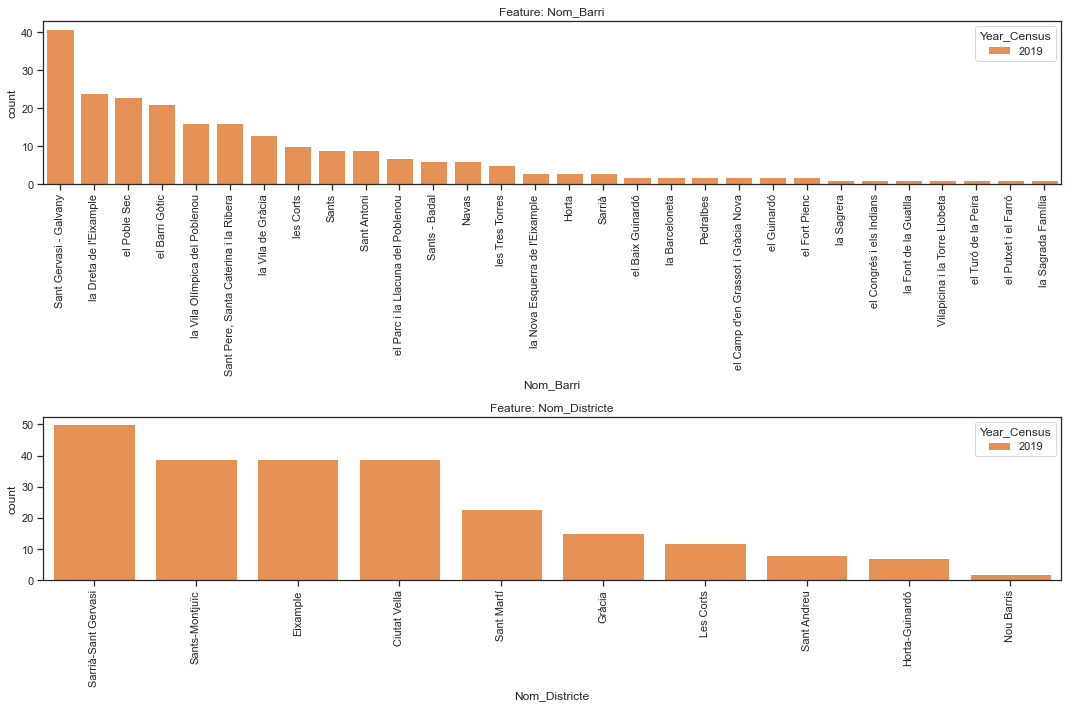

In [183]:
# Where are SN_Oci_Nocturn places located?

# Plot features related to districts and neighborhoods 
features_loc = ['Nom_Barri',
                'Nom_Districte']

noct_gf_bcn_2019 = gf_bcn_2019[gf_bcn_2019['SN_Oci_Nocturn']==0]

# Plot categorical features
ncol = 1
nrow = 2

plt.figure(figsize=(15,10))
for i, feat in enumerate(features_loc):
    plt.subplot(nrow,ncol,i+1)
    sns.countplot(x=feat, 
                  data=noct_gf_bcn_2019,
                  hue='Year_Census',
                  order = noct_gf_bcn_2019[feat].value_counts().index,
                  palette='YlOrRd')
    plt.xticks(rotation='vertical')
    plt.title('Feature: ' + feat, fontsize=12)
plt.tight_layout()

In [187]:
cowk_gf_bcn_2019['Nom_Barri'].value_counts()

Sant Gervasi - la Bonanova                      39
Sant Gervasi - Galvany                          36
la Vila de Gràcia                               31
Sarrià                                          30
les Tres Torres                                 23
Sant Pere, Santa Caterina i la Ribera           20
el Putxet i el Farró                            18
el Barri Gòtic                                  16
el Fort Pienc                                   14
Sants - Badal                                   13
el Poble Sec                                    13
la Dreta de l'Eixample                          10
el Poblenou                                      8
el Parc i la Llacuna del Poblenou                7
la Nova Esquerra de l'Eixample                   6
el Bon Pastor                                    5
les Corts                                        4
Sant Antoni                                      4
Provençals del Poblenou                          4
la Vila Olímpica del Poblenou  

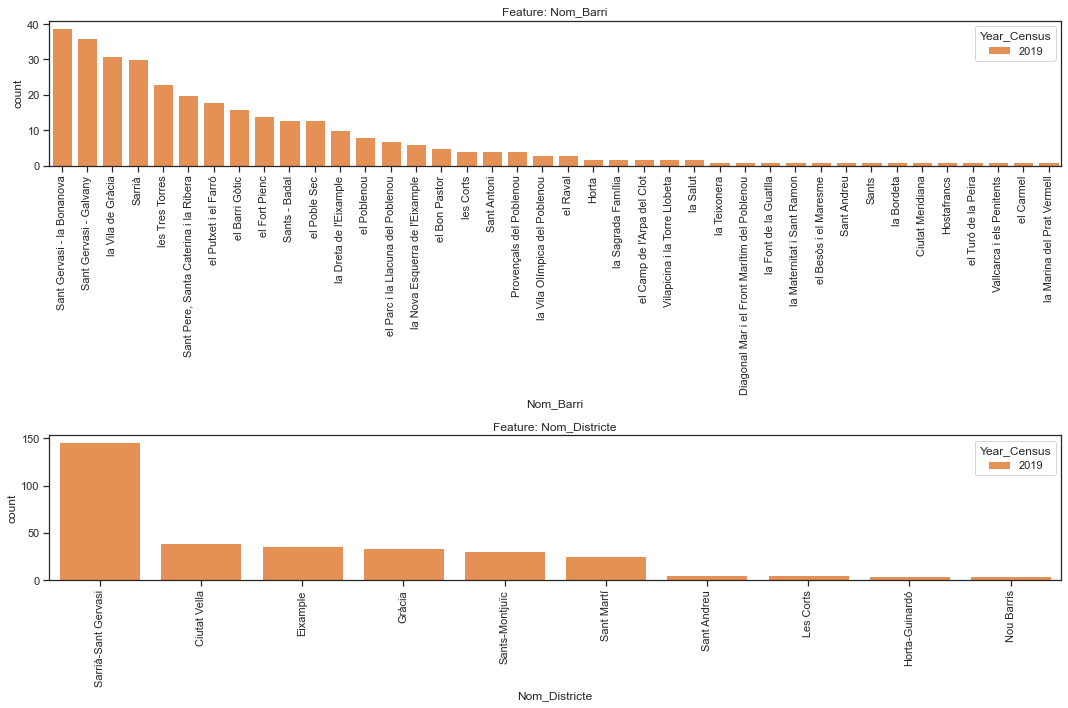

In [188]:
# Where are SN_Coworking places located?

# Plot features related to districts and neighborhoods 
features_loc = ['Nom_Barri',
                'Nom_Districte']

cowk_gf_bcn_2019 = gf_bcn_2019[gf_bcn_2019['SN_Coworking']==0]

# Plot categorical features
ncol = 1
nrow = 2

plt.figure(figsize=(15,10))
for i, feat in enumerate(features_loc):
    plt.subplot(nrow,ncol,i+1)
    sns.countplot(x=feat, 
                  data=cowk_gf_bcn_2019,
                  hue='Year_Census',
                  order = cowk_gf_bcn_2019[feat].value_counts().index,
                  palette='YlOrRd')
    plt.xticks(rotation='vertical')
    plt.title('Feature: ' + feat, fontsize=12)
plt.tight_layout()

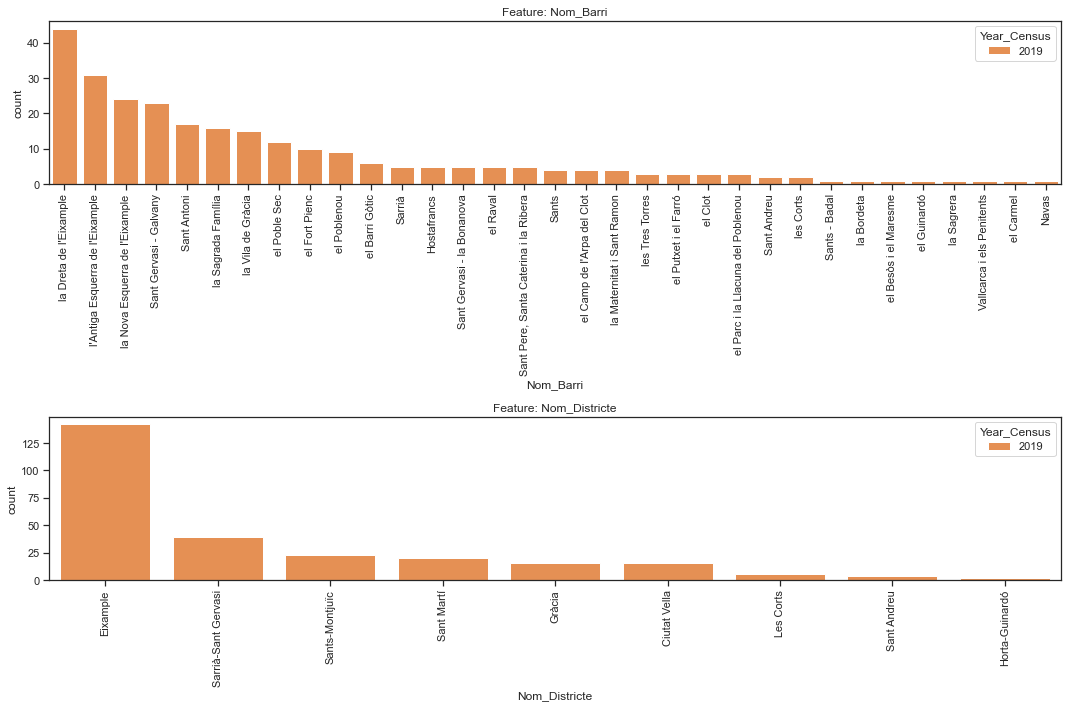

In [189]:
# Where are SN_Obert24h places located?

# Plot features related to districts and neighborhoods 
features_loc = ['Nom_Barri',
                'Nom_Districte']

obert24_gf_bcn_2019 = gf_bcn_2019[gf_bcn_2019['SN_Obert24h']==0]

# Plot categorical features
ncol = 1
nrow = 2

plt.figure(figsize=(15,10))
for i, feat in enumerate(features_loc):
    plt.subplot(nrow,ncol,i+1)
    sns.countplot(x=feat, 
                  data=obert24_gf_bcn_2019,
                  hue='Year_Census',
                  order = obert24_gf_bcn_2019[feat].value_counts().index,
                  palette='YlOrRd')
    plt.xticks(rotation='vertical')
    plt.title('Feature: ' + feat, fontsize=12)
plt.tight_layout()

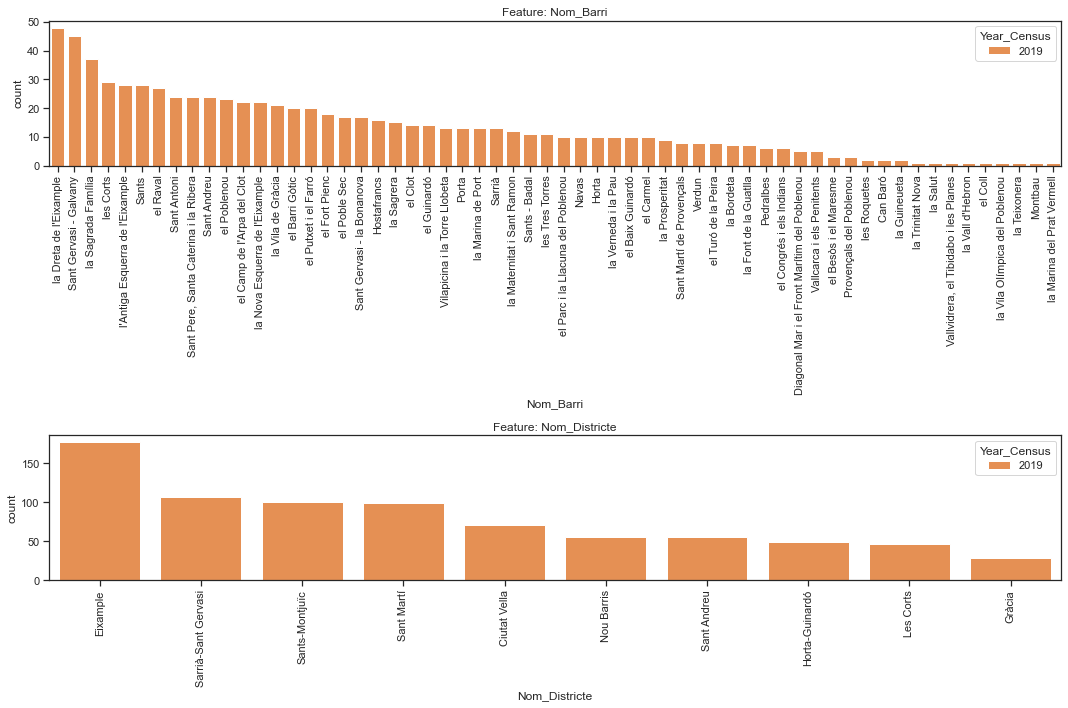

In [190]:
# Where are SN_Servei_Degustacio places located?

# Plot features related to districts and neighborhoods 
features_loc = ['Nom_Barri',
                'Nom_Districte']

degustacio_gf_bcn_2019 = gf_bcn_2019[gf_bcn_2019['SN_Servei_Degustacio']==0]

# Plot categorical features
ncol = 1
nrow = 2

plt.figure(figsize=(15,10))
for i, feat in enumerate(features_loc):
    plt.subplot(nrow,ncol,i+1)
    sns.countplot(x=feat, 
                  data=degustacio_gf_bcn_2019,
                  hue='Year_Census',
                  order = degustacio_gf_bcn_2019[feat].value_counts().index,
                  palette='YlOrRd')
    plt.xticks(rotation='vertical')
    plt.title('Feature: ' + feat, fontsize=12)
plt.tight_layout()

In [52]:
# Import superficie area from 2016 and 2019
# Ref: https://opendata-ajuntament.barcelona.cat/data/ca/dataset/est-superficie

# Load datasets
area_bcn_2016 = pd.read_csv("../data/2016_superficie.csv")
area_bcn_2019 = pd.read_csv("../data/2019_superficie.csv")

In [53]:
# Change index to concat
area_bcn_2016.index = area_bcn_2016['Nom_Barri']
area_bcn_2019.index = area_bcn_2019['Nom_Barri']

In [54]:
# Create counts dataframe per neighborhood
counts_df_2016 = gf_bcn_2016['Nom_Barri'].value_counts().to_frame()
counts_df_2016.rename(columns={'Nom_Barri': 'Activity_Counts'}, inplace=True)

counts_df_2019 = gf_bcn_2019['Nom_Barri'].value_counts().to_frame()
counts_df_2019.rename(columns={'Nom_Barri': 'Activity_Counts'}, inplace=True)

In [55]:
# Concatenate counts with area dataframe
counts_df_2019_area = pd.concat([counts_df_2019, area_bcn_2019], join='inner', axis=1)
counts_df_2016_area = pd.concat([counts_df_2016, area_bcn_2016], join='inner', axis=1)

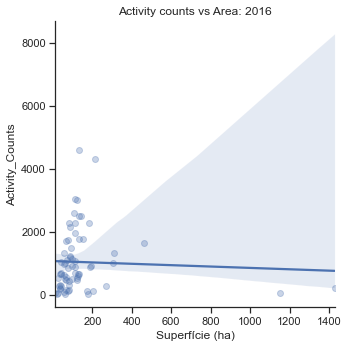

In [56]:
# Explore if there's correlation between number of places and area
# Activity counts vs Area - 2016
sns.lmplot(y='Activity_Counts',
           x='Superfície (ha)',
           data=counts_df_2016_area,
           scatter_kws={'alpha':0.3},
           legend_out=False)
plt.title('Activity counts vs Area: 2016')
plt.tight_layout()

* No clear relationship

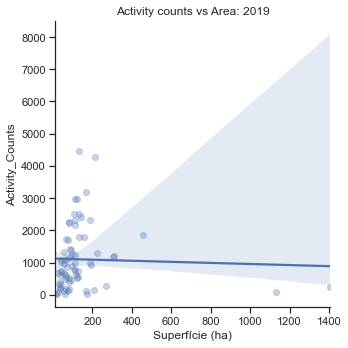

In [57]:
# Explore if there's correlation between number of places and area
# Activity counts vs Area - 2019
sns.lmplot(y='Activity_Counts',
           x='Superfície (ha)',
           data=counts_df_2019_area,
           scatter_kws={'alpha':0.3},
           legend_out=False)
plt.title('Activity counts vs Area: 2019')
plt.tight_layout()

* No clear relationship

## Step3: Attempt to use geolocation information
* To be continued...

In [60]:
# Load geojson file
gf_bcn_geo = "../data/2019_censcomercialbcn_detall.geojson"
map_data = gpd.read_file(gf_bcn_geo)
map_data.head()

,ID_Bcn_2019,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2019,Nom_Activitat,Codi_Activitat_2016,Nom_Local,SN_Oci_Nocturn,SN_Coworking,SN_Servei_Degustacio,SN_Obert24h,SN_Mixtura,SN_Carrer,SN_Mercat,Nom_Mercat,SN_Galeria,Nom_Galeria,SN_CComercial,Nom_CComercial,SN_Eix,Nom_Eix,X_UTM_ETRS89,Y_UTM_ETRS89,Latitud,Longitud,Direccio_Unica,Codi_Via,Nom_Via,Planta,Porta,Num_Policia_Inicial,Lletra_Inicial,Num_Policia_Final,Lletra_Final,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_cadastral,Data_Revisio,geometry
0,1075454,None,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,16004,SORIGUE,1,1,1,1,1,0,1,,1,,1,,1,,427229.272,4577543.637,41.34610100,2.13016600,"222206, 19-19, LOC 10",222206,MOTORS,LOC,10,19,None,19,None,None,,,025,12,la Marina del Prat Vermell,03,Sants-Montjuïc,None,20190925,POINT (2.13017 41.34610)
1,1075453,None,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,1600102,CEJIDOS SIVILA S.A,1,1,1,1,1,0,1,,1,,1,,1,,427178.393,4577526.160,41.34593900,2.12956000,"222206, 278-282, LOC 10",222206,MOTORS,LOC,10,278,None,282,None,None,,,025,12,la Marina del Prat Vermell,03,Sants-Montjuïc,None,20190925,POINT (2.12956 41.34594)
2,1075451,None,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,16004,QUALITY ESPRESO,1,1,1,1,1,0,1,,1,,1,,1,,427092.921,4577488.381,41.34559100,2.12854300,"222206, 1-9, LOC 10",222206,MOTORS,LOC,10,1,None,9,None,None,,,025,12,la Marina del Prat Vermell,03,Sants-Montjuïc,None,20190925,POINT (2.12854 41.34559)
3,1075449,None,1,Actiu,3,Altres,17,Altres,1700100,Administració,17001,CLD,1,1,1,1,1,0,1,,1,,1,,1,,427265.676,4577561.147,41.34626200,2.13059900,"222206, 21-21, LOC 10",222206,MOTORS,LOC,10,21,None,21,None,None,,,025,12,la Marina del Prat Vermell,03,Sants-Montjuïc,None,20190925,POINT (2.13060 41.34626)
4,1075448,None,1,Actiu,2,Serveis,16,Altres,1600101,Activitats de transport,1600101,"CATALANA DEL BUTANO,S.A",1,1,1,1,1,0,1,,1,,1,,1,,427322.177,4577588.560,41.34651400,2.13127100,"222206, 25-27, LOC 10",222206,MOTORS,LOC,10,25,None,27,None,None,,,025,12,la Marina del Prat Vermell,03,Sants-Montjuïc,None,20190925,POINT (2.13127 41.34651)


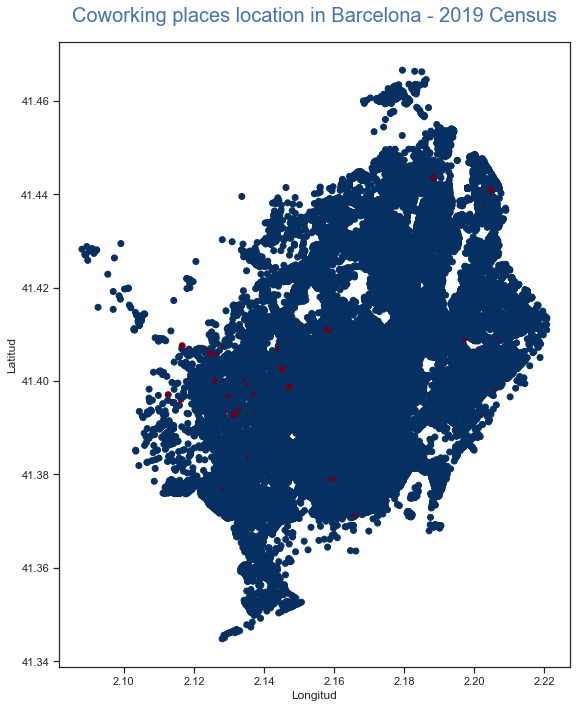

In [75]:
# Plot map - Location of Coworking places in Barcelona 2019
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Coworking places location in Barcelona - 2019 Census', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
map_data.plot(column='SN_Coworking', 
              cmap='RdBu', 
              ax=ax, 
              zorder=5)
plt.tight_layout()

* Work in progress, more time needed... :)

In [1]:
# Barcelona map with folium
barcelona_map = folium.Map([41.3947,2.1557], zoom_start=12.4, tiles='cartodbpositron')
# plot map
barcelona_map